<a href="https://colab.research.google.com/github/eescalante58/Repositorio-Python/blob/main/TareaTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia de Datos

## Tarea práctica 3                                   
Le han encomendado realizar crear un programa que permita analizar la lista de pasajeros que tenia el Titanic, esta lista posee los datos siguientes: 

- Clase
- Sobrevivió
- Nombre
- Sexo
- Edad
- Ticket
- Tarifa
- Cabina
- Bote de Rescate (Si sobrevivió)
- Numeración del Cuerpo (Encontrado si murió)
- Destino que se dirigía

El programa debe permitir hacer búsquedas por código de ticket para buscar la información de un pasajero, 
además debe tener la opción para poder observar la siguiente reportería:

- Una gráfica de cuantas personas murieron y cuantas sobrevivieron (en pastel)
- Gráfica para la cantidad de sobrevivientes por clase (de barra)
- Saber los costos de los tickets (Mas caros y mas barato)

Con la base de datos proporcionada, realice una limpieza y preparación para poder cargarlo como archivo .csv en Python, utilice librerías vistas en clases para dar solución a las peticiones dadas.

13 de septiembre de 2021

In [521]:
import numpy as np
import pandas as pd
import os

In [522]:
# para tener acceso a los archivos en google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [523]:
dir_pd = '/content/drive/My Drive/ColabNoteBook/data/{}'.format('PasajerosTitanic.csv')

In [524]:
dfTitanicOrg = pd.read_csv(dir_pd)

### Limpieza de datos

In [525]:
dfTitanic =dfTitanicOrg.fillna({'Tarifa': 0})

In [526]:
dfTitanic['Tarifa'].replace(
    to_replace=[0],
    value=33.733917,
    inplace=True
)

In [527]:
dfTitanic['Sobrevivio'] = dfTitanic['Sobrevivio'].astype(str)
dfTitanic.dtypes

_id                  int64
Clase                int64
Sobrevivio          object
Nombre              object
Sexo                object
Edad               float64
Ticket              object
Tarifa             float64
Cabina              object
Bote de Rescate     object
Cuerpo             float64
Destino             object
dtype: object

In [528]:
dfTitanic['Sobrevivio'].replace(
    to_replace=['0'],
    value='Murio',
    inplace=True
)
dfTitanic['Sobrevivio'].replace(
    to_replace=['1'],
    value='Sobrevivio',
    inplace=True
)

In [529]:

dfTitanic.describe()

,_id,Clase,Edad,Tarifa,Cuerpo
count,1309.000000,1309.000000,1046.000000,1309.000000,121.000000
mean,655.000000,2.294882,29.881138,33.733917,160.809917
std,378.020061,0.837836,14.413493,51.597612,97.696922
min,1.000000,1.000000,0.170000,3.170800,1.000000
25%,328.000000,2.000000,21.000000,7.925000,72.000000
50%,655.000000,3.000000,28.000000,14.500000,155.000000
75%,982.000000,3.000000,39.000000,32.500000,256.000000
max,1309.000000,3.000000,80.000000,512.329200,328.000000


### El programa debe permitir hacer búsquedas por código de ticket para buscar la información
de un pasajero

In [530]:
dfTitanic.head(10)

,_id,Clase,Sobrevivio,Nombre,Sexo,Edad,Ticket,Tarifa,Cabina,Bote de Rescate,Cuerpo,Destino
0,1,1,Sobrevivio,Allen Miss. Elisabeth Walton,Mujer,29.00,24160,211.337500,B5,2,NaN,St Louis MO
1,2,1,Sobrevivio,Allison Master. Hudson Trevor,Hombre,0.92,113781,151.550000,C22 C26,11,NaN,Montreal PQ / Chesterville ON
2,3,1,Murio,Allison Miss. Helen Loraine,Mujer,2.00,113781,151.550000,C22 C26,NaN,NaN,Montreal PQ / Chesterville ON
3,4,1,Murio,Allison Mr. Hudson Joshua Creighton,Hombre,30.00,113781,151.550000,C22 C26,NaN,135.0,Montreal PQ / Chesterville ON
4,5,1,Murio,Allison Mrs. Hudson J C (Bessie Waldo Daniels),Mujer,25.00,113781,151.550000,C22 C26,NaN,NaN,Montreal PQ / Chesterville ON
5,6,1,Sobrevivio,Anderson Mr. Harry,Hombre,48.00,19952,26.550000,E12,3,NaN,New York NY
6,7,1,Sobrevivio,Andrews Miss. Kornelia Theodosia,Mujer,63.00,13502,77.958300,D7,10,NaN,Hudson NY
7,8,1,Murio,Andrews Mr. Thomas Jr,Hombre,39.00,112050,33.733917,A36,NaN,NaN,Belfast NI
8,9,1,Sobrevivio,Appleton Mrs. Edward Dale (Charlotte Lamson),Mujer,53.00,11769,51.479200,C101,D,NaN,Bayside Queens NY
9,10,1,Murio,Artagaveytia Mr. Ramon,Hombre,71.00,PC 17609,49.504200,NaN,NaN,22.0,Montevideo Uruguay


In [531]:
dfTitanic.tail(10)

,_id,Clase,Sobrevivio,Nombre,Sexo,Edad,Ticket,Tarifa,Cabina,Bote de Rescate,Cuerpo,Destino
1299,1300,3,Murio,Yasbeck Mr. Antoni,Hombre,27.0,2659,14.4542,NaN,C,NaN,NaN
1300,1301,3,Sobrevivio,Yasbeck Mrs. Antoni (Selini Alexander),Mujer,15.0,2659,14.4542,NaN,NaN,NaN,NaN
1301,1302,3,Murio,Youseff Mr. Gerious,Hombre,45.5,2628,7.2250,NaN,NaN,312.0,NaN
1302,1303,3,Murio,Yousif Mr. Wazli,Hombre,NaN,2647,7.2250,NaN,NaN,NaN,NaN
1303,1304,3,Murio,Yousseff Mr. Gerious,Hombre,NaN,2627,14.4583,NaN,NaN,NaN,NaN
1304,1305,3,Murio,Zabour Miss. Hileni,Mujer,14.5,2665,14.4542,NaN,NaN,328.0,NaN
1305,1306,3,Murio,Zabour Miss. Thamine,Mujer,NaN,2665,14.4542,NaN,NaN,NaN,NaN
1306,1307,3,Murio,Zakarian Mr. Mapriededer,Hombre,26.5,2656,7.2250,NaN,NaN,304.0,NaN
1307,1308,3,Murio,Zakarian Mr. Ortin,Hombre,27.0,2670,7.2250,NaN,NaN,NaN,NaN
1308,1309,3,Murio,Zimmerman Mr. Leo,Hombre,29.0,315082,7.8750,NaN,NaN,NaN,NaN


In [532]:
varTicket = input("Ingrese el número de Ticket a consultar?:")
varCondicionQuery = 'Ticket == ' + '"' + varTicket + '"'
varCondicionQuery

Ingrese el número de Ticket a consultar?:2659


'Ticket == "2659"'

In [533]:
dfTitanic.query(varCondicionQuery) 

,_id,Clase,Sobrevivio,Nombre,Sexo,Edad,Ticket,Tarifa,Cabina,Bote de Rescate,Cuerpo,Destino
1299,1300,3,Murio,Yasbeck Mr. Antoni,Hombre,27.0,2659,14.4542,NaN,C,NaN,NaN
1300,1301,3,Sobrevivio,Yasbeck Mrs. Antoni (Selini Alexander),Mujer,15.0,2659,14.4542,NaN,NaN,NaN,NaN


In [534]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 12)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [535]:
dfQueryResult = dfTitanic.query(varCondicionQuery) 
if dfQueryResult.empty:
    print("No existe Ticket")
else:
   print(dfQueryResult)    

       _id  Clase  Sobrevivio                                  Nombre    Sexo  \
1299  1300      3       Murio                      Yasbeck Mr. Antoni  Hombre   
1300  1301      3  Sobrevivio  Yasbeck Mrs. Antoni (Selini Alexander)   Mujer   

      Edad Ticket   Tarifa Cabina Bote de Rescate  Cuerpo Destino  
1299  27.0   2659  14.4542    NaN               C     NaN     NaN  
1300  15.0   2659  14.4542    NaN             NaN     NaN     NaN  


In [536]:
dfQueryResult.shape[0]

2

In [537]:
from tabulate import tabulate
def pprint_df(dframe):
    print (tabulate(dframe, headers='keys', tablefmt='psql', showindex=False))

In [538]:


print("=====================================================================================================================")
print("Ticket:--->", varTicket, "Con tarifa de", dfQueryResult.iloc[0]['Tarifa'], ", Viajo en clase:", dfQueryResult.iloc[0]['Clase'], "Con destino a", dfQueryResult.iloc[0]['Destino'] )
print()
print("Pasajero(", dfQueryResult.shape[0],  "):")

pprint_df(dfQueryResult[['Nombre','Sexo','Edad', 'Sobrevivio', 'Cabina', 'Cuerpo','Bote de Rescate']])



Ticket:---> 2659 Con tarifa de 14.4542 , Viajo en clase: 3 Con destino a nan

Pasajero( 2 ):
+----------------------------------------+--------+--------+--------------+----------+----------+-------------------+
| Nombre                                 | Sexo   |   Edad | Sobrevivio   |   Cabina |   Cuerpo | Bote de Rescate   |
|----------------------------------------+--------+--------+--------------+----------+----------+-------------------|
| Yasbeck Mr. Antoni                     | Hombre |     27 | Murio        |      nan |      nan | C                 |
| Yasbeck Mrs. Antoni (Selini Alexander) | Mujer  |     15 | Sobrevivio   |      nan |      nan | nan               |
+----------------------------------------+--------+--------+--------------+----------+----------+-------------------+


### Una gráfica de cuantas personas murieron y cuantas sobrevivieron (en pastel)

In [539]:
import matplotlib.pyplot as plt

In [540]:
dfTitanicSobrevivio = dfTitanic[['Sobrevivio']]


In [541]:
grpSobrevivencia = pd.DataFrame({'count' : dfTitanicSobrevivio.groupby( ["Sobrevivio"] ).size()}).reset_index()


In [542]:
grpTitanicSobrevivio = dfTitanicSobrevivio.groupby( [ 'Sobrevivio'] )["Sobrevivio"].count()

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f96a89a8250>>

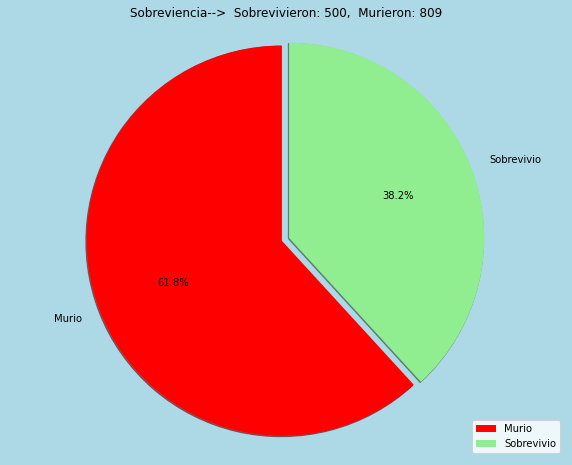

In [543]:

#pltSobrevivencia =   grpTitanicSobrevivio.loc[["Sobrevivio","No Sobrevivio"]].plot(
#kind = "pie",  grid = True,  autopct='%1.1f%%', title = "Sobrevivientes y Muertos", colors = ["green", "red"], shadow = True, startangle=15)
varTitulo = 'Sobreviencia-->  ' + 'Sobrevivieron: ' + str( grpTitanicSobrevivio[1]) + ',  Murieron: ' + str(grpTitanicSobrevivio[0])
varlabels = "Murio", "Sobrevivio",
varcolors = ['red', 'lightgreen']
varexplode = (0.2, 0)
fig, ax =  plt.subplots(facecolor = 'lightblue', figsize = [10, 8], edgecolor = "black")  # Create a figure containing a single axes.
ax.pie(grpTitanicSobrevivio, labels=varlabels, autopct='%1.1f%%', startangle=90, shadow = True, colors=varcolors, explode=varexplode, radius = 5)
plt.title(varTitulo)
plt.axis('equal')
plt.legend(varlabels)
ax.plot

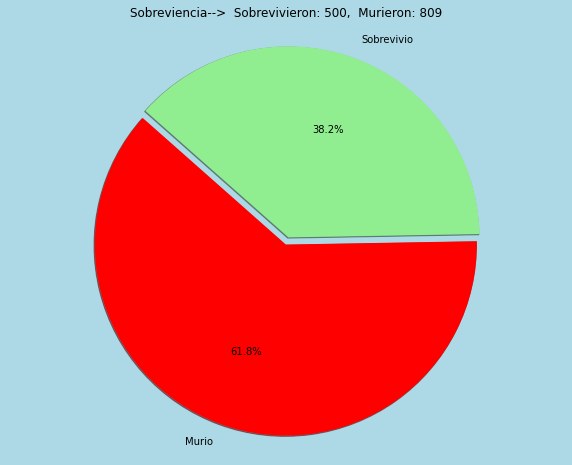

In [544]:
varTitulo = 'Sobreviencia-->  ' + 'Sobrevivieron: ' + str( grpTitanicSobrevivio[1]) + ',  Murieron: ' + str(grpTitanicSobrevivio[0])
varlabels = "Murio", "Sobrevivio",
varcolors = ['lightgreen','red']
varexplode = (0.2, 0)
fig, ax =  plt.subplots(facecolor = 'lightblue', figsize = [10, 8], edgecolor = "black") 
pltSobrevivencia =   grpTitanicSobrevivio.loc[["Sobrevivio","Murio"]].plot(
kind = "pie",  grid = True,  autopct='%1.1f%%',  colors = varcolors, shadow = True, startangle=1, explode=varexplode, radius = 5)
plt.title(varTitulo)
pltSobrevivencia.set_ylabel("")
plt.axis('equal')
plt.show()

### Gráfica para la cantidad de sobrevivientes por clase (de barra)

In [545]:

dfTitanicSobrevivio = dfTitanic[dfTitanic["Sobrevivio"] == 'Sobrevivio']
dfTitanicSobrevivioPorClase =  dfTitanicSobrevivioPorClase.astype(str)
dfTitanicSobrevivioPorClase['Clase'].replace(
    to_replace=['1'],
    value='1ra Clase',
    inplace=True
)
dfTitanicSobrevivioPorClase['Clase'].replace(
    to_replace=['2'],
    value='2da Clase',
    inplace=True
)
dfTitanicSobrevivioPorClase['Clase'].replace(
    to_replace=['3'],
    value='3ra Clase',
    inplace=True
)


In [546]:
grpTitanicSobrevivioPorClase = dfTitanicSobrevivioPorClase.groupby(by = "Clase")["Clase"].count()

# Convertir Groupby en Dataframe

In [547]:
df1 = dfTitanicSobrevivioPorClase
g1 = df1.groupby( ["Clase","Sobrevivio"] )["Sobrevivio"].count()

In [548]:
df2 = pd.DataFrame({'count' : df1.groupby( ["Clase"] ).size()}).reset_index()

## Graficar resultados

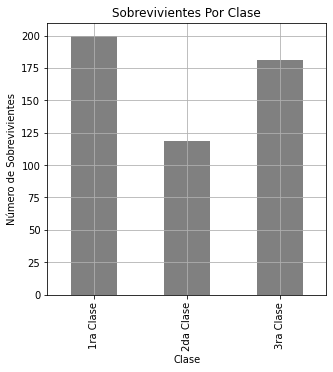

In [549]:
pltPorclase =   grpTitanicSobrevivioPorClase.loc[["1ra Clase","2da Clase", "3ra Clase"]].plot(
kind = "bar", color = "gray", grid = True, figsize = (5, 5), title = "Sobrevivientes Por Clase")
pltPorclase.set_xlabel("Clase")
pltPorclase.set_ylabel("Número de Sobrevivientes")
plt.show()

### Saber los costos de los tickets (Mas caros y mas barato)

In [550]:
dfTitanicTarifa = dfTitanic[['Tarifa']]
dfTitanicTarifa
varTitanicTarifaMax = dfTitanicTarifa['Tarifa'].max()
varTitanicTarifaMin = dfTitanicTarifa['Tarifa'].min()
print ("Tarifa minima: ", str(varTitanicTarifaMin), " Tarifa Maxima: ", str(varTitanicTarifaMax))

Tarifa minima:  3.1708  Tarifa Maxima:  512.3292


In [551]:
dictTarifaMinMax = {
    'TarifaMinima': [varTitanicTarifaMin],
    'TarifaMaxima': [varTitanicTarifaMax]
}

In [552]:
dfTarifaMinMax = pd.DataFrame(dictTarifaMinMax)
dfTarifaMinMax

,TarifaMinima,TarifaMaxima
0,3.1708,512.3292


In [553]:
dir_pd = '/content/drive/My Drive/ColabNoteBook/data/{}'.format('TarifaMinMax.csv')
dfTarifaMinMax.to_csv(dir_pd, index=False)

In [554]:
grpdfTitanicTarifa = dfTitanicTarifa.groupby(by = "Tarifa")["Tarifa"].count()
grpdfTitanicTarifa


Tarifa
3.1708      1
4.0125      1
5.0000      1
6.2375      1
6.4375      3
           ..
227.5250    5
247.5208    3
262.3750    7
263.0000    6
512.3292    4
Name: Tarifa, Length: 281, dtype: int64

In [555]:
grpdfTitanicTarifa.head(10)


Tarifa
3.1708    1
4.0125    1
5.0000    1
6.2375    1
6.4375    3
6.4500    1
6.4958    3
6.7500    2
6.8583    1
6.9500    2
Name: Tarifa, dtype: int64

In [556]:
grpdfTitanicTarifa.tail(10)

Tarifa
153.4625    3
164.8667    4
211.3375    4
211.5000    5
221.7792    4
227.5250    5
247.5208    3
262.3750    7
263.0000    6
512.3292    4
Name: Tarifa, dtype: int64

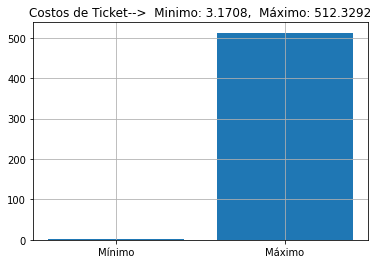

In [557]:
arrEtiquetas = np.array(["Mínimo", "Máximo"])
arrCostos    =   np.array([varTitanicTarifaMin, varTitanicTarifaMax])
varTitulo = 'Costos de Ticket-->  ' + 'Minimo: ' + str( arrCostos[0]) + ',  Máximo: ' + str(arrCostos[1])
plt.bar(arrEtiquetas,arrCostos)
plt.title(varTitulo)
plt.grid()
plt.show()


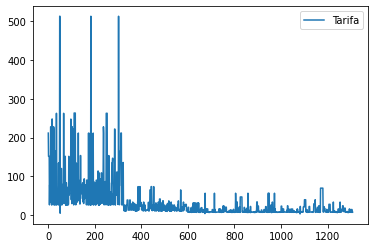

In [558]:
dfTitanic[['Tarifa']].plot()

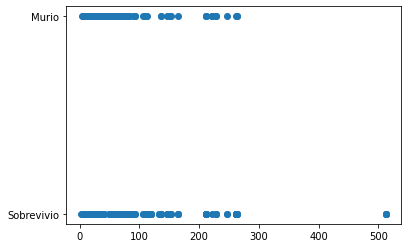

In [559]:
plt.scatter(dfTitanic['Tarifa'],dfTitanic['Sobrevivio'])

# DashBoard

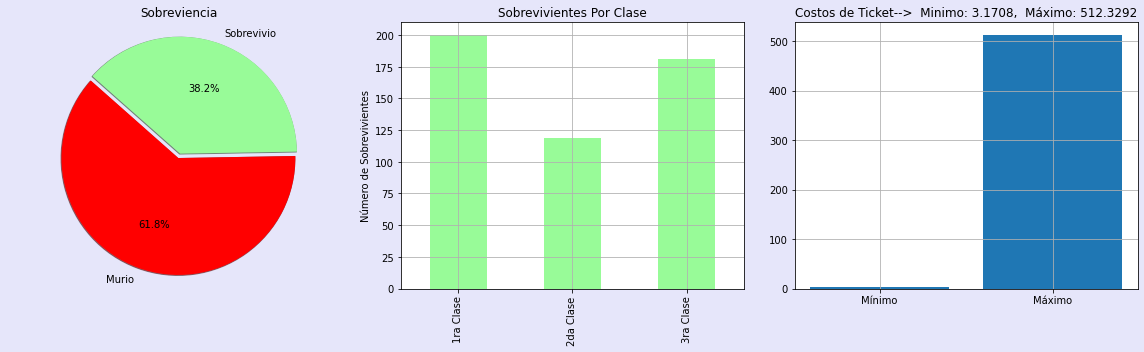

In [560]:



fig, ax =  plt.subplots(facecolor = 'lavender') 
fig.set_size_inches(16,5)
#--------Grafica de Pastel Solicitada ------------
varTitulo = 'Sobreviencia'
lstColors = ['palegreen','red']
ax= plt.subplot(1, 3, 1)                   #Axis
pltSobrevivencia =   grpTitanicSobrevivio.loc[["Sobrevivio","Murio"]].plot(
kind = "pie",  grid = True,  autopct='%1.1f%%', colors = lstColors, shadow = True, startangle=1, explode=(0.2, 0), radius = 5)
plt.title(varTitulo)
pltSobrevivencia.set_ylabel("")
plt.axis('equal')

#---------- Sobrevivientes por clase ----------------

ax= plt.subplot(1, 3, 2)                   #Axis
pltPorclase =   grpTitanicSobrevivioPorClase.loc[["1ra Clase","2da Clase", "3ra Clase"]].plot(
kind = "bar", color = "palegreen", grid = True, title = "Sobrevivientes Por Clase")
pltPorclase.set_xlabel("")
pltPorclase.set_ylabel("Número de Sobrevivientes")
plt.tight_layout()

#---------- Costo Minimo y Maximo ----------------
ax= plt.subplot(1, 3, 3)                   #Axis
arrEtiquetas = np.array(["Mínimo", "Máximo"])
arrCostos    =   np.array([varTitanicTarifaMin, varTitanicTarifaMax])
varTitulo = 'Costos de Ticket-->  ' + 'Minimo: ' + str( arrCostos[0]) + ',  Máximo: ' + str(arrCostos[1])
plt.bar(arrEtiquetas,arrCostos)
plt.title(varTitulo)
plt.grid()

#--------------Mostrar Dashboard

plt.show()
plt.close('all')